In [24]:
import argparse
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import utils, datasets, transforms
from torchvision.utils import save_image

import time
import scipy
from numpy.linalg import inv
import sys
import os

# from torchvision import transforms

from PIL import Image
import matplotlib.pyplot as plt

In [3]:
def view_image(tensor):  # input: (C, H, W)
	img = utils.make_grid(tensor)
	img = img / 2 + 0.5   # unnormalize
	npimg = img.numpy()   # convert from tensor
	plt.imshow(np.transpose(npimg, (1, 2, 0))) 
	plt.show()

In [22]:
def eval_psnr(outputs, targets):
	'''
	input: (outputs, targets)
	output: PSNR, a scalar value
	'''
	mse2psnr = lambda x: -10. * torch.log(x) / torch.log(torch.tensor([10.], device=x.device))
	mse = ((outputs-targets)**2).mean()
	return mse2psnr(mse).item()

In [ ]:

# def view_image(tensor):  # input: (C, H, W)
#   print(tensor.size())
#   img = utils.make_grid(tensor)
#   img = img / 2 + 0.5   # unnormalize
#   npimg = img.numpy()   # convert from tensor
#   npimg = np.transpose(npimg, (1, 2, 0))
#   # plt.imshow(npimg.astype("uint8")) 
#   # plt.imshow(out.astype('uint8'))
#   plt.imshow((npimg * 255).astype(np.uint8))
#   # plt.savefig(filename, bbox_inches='tight')
#   plt.show()

In [ ]:
# outputs: torch.Size([1, 170, 170, 3])
outputs = outputs.permute(0,  3, 1,2)
print("outputs: ", outputs.size())

filename = "/content/drive/MyDrive/GitHub/deepPCA/images/restult_zq.jpg"
# pil_image = transforms.ToPILImage()(npimg*255).save(filename)
save_image(outputs, filename)
view_image(outputs[0])

In [25]:
image_path = "./datasets/images_deepLSE/baby_mini_d3_gaussian.jpg"

img = Image.open(image_path)
convert_tensor = transforms.ToTensor()
print(convert_tensor(img))
tensor_img = convert_tensor(img)
print(tensor_img.size())

tensor([[[0.9922, 0.9922, 0.9922,  ..., 0.9882, 0.9922, 0.9922],
         [0.9882, 0.9882, 0.9882,  ..., 0.9882, 0.9922, 0.9922],
         [0.9804, 0.9804, 0.9804,  ..., 0.9882, 0.9922, 0.9922],
         ...,
         [0.4549, 0.4627, 0.4745,  ..., 0.1725, 0.2157, 0.2314],
         [0.4235, 0.3647, 0.3725,  ..., 0.2392, 0.2314, 0.2235],
         [0.3804, 0.3216, 0.3333,  ..., 0.2431, 0.2314, 0.2235]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.9961, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 1.0000, 1.0000],
         [0.9882, 0.9882, 0.9882,  ..., 0.9961, 1.0000, 1.0000],
         ...,
         [0.3882, 0.3961, 0.4078,  ..., 0.1882, 0.2275, 0.2549],
         [0.3608, 0.3020, 0.3098,  ..., 0.2549, 0.2431, 0.2471],
         [0.3176, 0.2588, 0.2706,  ..., 0.2588, 0.2431, 0.2471]],

        [[0.9961, 0.9961, 0.9961,  ..., 0.9922, 0.9961, 0.9961],
         [0.9922, 0.9922, 0.9922,  ..., 0.9922, 0.9961, 0.9961],
         [0.9843, 0.9843, 0.9843,  ..., 0.9922, 0.9961, 0.

In [6]:
transforms.functional.get_image_size(img)


[170, 170]

In [7]:
tensor_img = tensor_img.unsqueeze(0)


In [8]:
print(tensor_img.size())

torch.Size([1, 3, 170, 170])


Test Bicubic

torch.Size([1, 3, 170, 170])
tensor([[[[ 0.9843,  0.9843,  0.9843,  ...,  0.9765,  0.9843,  0.9843],
          [ 0.9765,  0.9765,  0.9765,  ...,  0.9765,  0.9843,  0.9843],
          [ 0.9608,  0.9608,  0.9608,  ...,  0.9765,  0.9843,  0.9843],
          ...,
          [-0.0902, -0.0745, -0.0510,  ..., -0.6549, -0.5686, -0.5373],
          [-0.1529, -0.2706, -0.2549,  ..., -0.5216, -0.5373, -0.5529],
          [-0.2392, -0.3569, -0.3333,  ..., -0.5137, -0.5373, -0.5529]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  0.9922,  1.0000,  1.0000],
          [ 0.9922,  0.9922,  0.9922,  ...,  0.9922,  1.0000,  1.0000],
          [ 0.9765,  0.9765,  0.9765,  ...,  0.9922,  1.0000,  1.0000],
          ...,
          [-0.2235, -0.2078, -0.1843,  ..., -0.6235, -0.5451, -0.4902],
          [-0.2784, -0.3961, -0.3804,  ..., -0.4902, -0.5137, -0.5059],
          [-0.3647, -0.4824, -0.4588,  ..., -0.4824, -0.5137, -0.5059]],

         [[ 0.9922,  0.9922,  0.9922,  ...,  0.9843,  0.9922,  0.9922],
 

/var/folders/02/s4q3cm9j6vq91r7dwrj91pp80000gn/T/ipykernel_88853/1756057961.py:3: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_9d63z49rj_/croot/pytorch_1681837279022/work/torch/csrc/utils/tensor_numpy.cpp:205.)
  img_data = torch.from_numpy(np.asarray(img)).double()


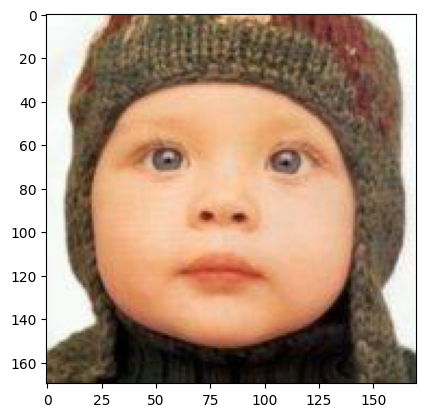

torch.Size([1, 3, 170, 170])
torch.Size([1, 3, 85, 85])
torch.Size([1, 3, 170, 170])


In [9]:
kwargs = {}
img = Image.open(image_path)
img_data = torch.from_numpy(np.asarray(img)).double()
# print(img_data.size())
# print(img_data)
# view_image(img_data)
# img = utils.make_grid(img_data)
# plt.imshow(img_data) 
# plt.show()

data = img_data.unsqueeze(0)/255
data = data*2 - 1 # normalize to [-1, 1]
data = data.permute(0, 3, 1, 2)


print(data.size())
print(data)
# data: shape [batch, 3, H, W] where 3 means RGB channels, batch=10, H=W=32

view_image(data[0]) # visualize the first image in the batch (optional)

raw_img = data.clone() # save a copy of raw image shape
print(raw_img.size())
compressed_img = torch.nn.functional.interpolate(data, scale_factor=0.5, mode='bicubic')
print(compressed_img.size())
X_data = torch.nn.functional.interpolate(compressed_img, scale_factor=2, mode='bicubic')
print(X_data.size())

In [10]:
def STEM(inputs, kernel=3):
	'''
	hint: stem should have shape [batchxHxW, 3xkernelxkernel] where batch=10, H=W=32, kernel=3
	'''
	B, C, H, W = inputs.shape
	X_pad = torch.nn.functional.pad(inputs, (1, 1, 1, 1), mode='constant', value=0) # padding it to be [B, C, (H+2), [W+2]]
	outputs = torch.zeros((B*H*W, C*kernel*kernel))
	for b in range(B):
		for i in range(H):
			for j in range(W):
				outputs[b*H*W + i*W + j] = X_pad[b, :, i:i+kernel, j:j+kernel].reshape(-1)
	return outputs

In [45]:
outImg = None
def LSE(inputs):
  X_data, raw_image, kernel = inputs
  B, C, H, W = X_data.shape
  stem = STEM(X_data, kernel) # [batchxHxW, 3xkernelxkernel]  # print(stem.shape)

  # print(raw_image.shape)
  # print(raw_image.reshape(-1, 1).shape)
  # print(stem.T.shape)
  # print(torch.matmul(raw_image.reshape(-1, 1), stem.T).shape)

  #on earth

  targets = raw_image.permute(0,2,3,1).reshape(B*H*W, C).float() # [batch, 3, H, W] -> [batchxHxW, 3]
  kernel_weights = torch.matmul(torch.inverse(torch.matmul(stem.t(),stem)+1e-3*torch.eye(stem.shape[-1])),
            torch.matmul(stem.t(), targets))
  # kernel_weights = torch.matmul(torch.inverse(torch.matmul(stem.t(),stem))+1e-3*torch.eye(stem.shape[-1]),
  # 		        torch.matmul(stem, targets.t()))
  #.eyes: A 2-D tensor with ones on the diagonal and zeros elsewhere

  # [XXt]^-1XYt
  #on mars
  conved = torch.matmul(stem, kernel_weights).reshape(B, H, W, C).permute(0,3,1,2)
  # view_image(conved[0])
  global outImg 
  outImg= conved[0] #restored img
  restored_img = conved[0]

  return restored_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


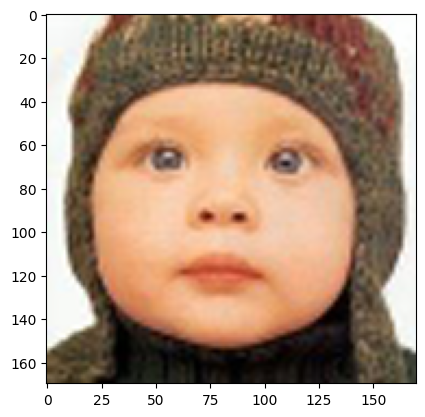

kernel = 2, eval_psnr: 25.820011138916016


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


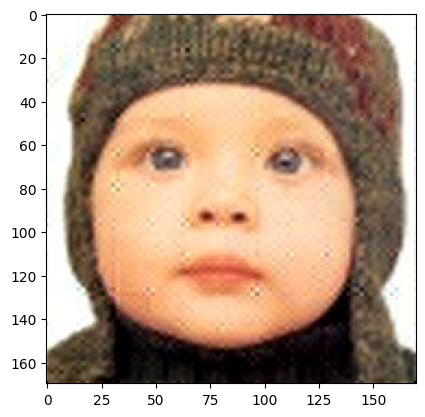

kernel = 3, eval_psnr: 19.614059448242188


In [51]:


for kernel in range(2,4):
    inImg = raw_img
    restored_img = LSE((X_data, raw_img,kernel))
    view_image(restored_img)
    print(f"kernel = {kernel}, eval_psnr: { eval_psnr(restored_img, raw_img)}")
   


